In [7]:
%load_ext autoreload
%autoreload 2
from readers.base import NeuralynxReader
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, decimate
import numpy as np
from pathlib import Path
import pandas as pd
import stumpy
from numba import cuda
import matplotlib.colors as mcolors
from detectors.motives import MotifFinder
%matplotlib tk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%%time
rootdir, channel = '/media/sil2/Data/Lizard/Pogona Data/Lizard15/12.14.2015/18-26-12_cheetah', 32 #mark
# rootdir, channel = '/media/sil2/Data/Lizard/lorenz_data/2019-11-17_17-43-33', 31 # lorenz
# rootdir, channel = '/media/sil2/Data/Lizard/lorenz_data/2019-10-21_18-00-39', 31  # lorenz - no claustrum
rd = NeuralynxReader(rootdir, channel=channel)
sc = rd.load_slow_cycles()
print(f'Reader initialized. fs={rd.fs:.0f}Hz, duration={rd.time_vector[-1]/3600:.1f} hours')

No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header c

In [12]:
%%time
%matplotlib inline
cycle_id = 50
mf = MotifFinder(rd, decimate_q=15, lowpass=50, filter_order=3)
cache_dir = mf.search(t_start=sc.loc[cycle_id, 'on'], t_stop=sc.loc[cycle_id+3, 'off'], durations=[1.2],
                      durations2remove=[1.2], is_cache=True)

Finish calculating matrix profile with window of 1.2 seconds in 0.5 minutes.
CPU times: user 28.6 s, sys: 601 ms, total: 29.2 s
Wall time: 28.3 s


No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header close date/time for application {} version Cheetah. Please contact developers.
No matching header c

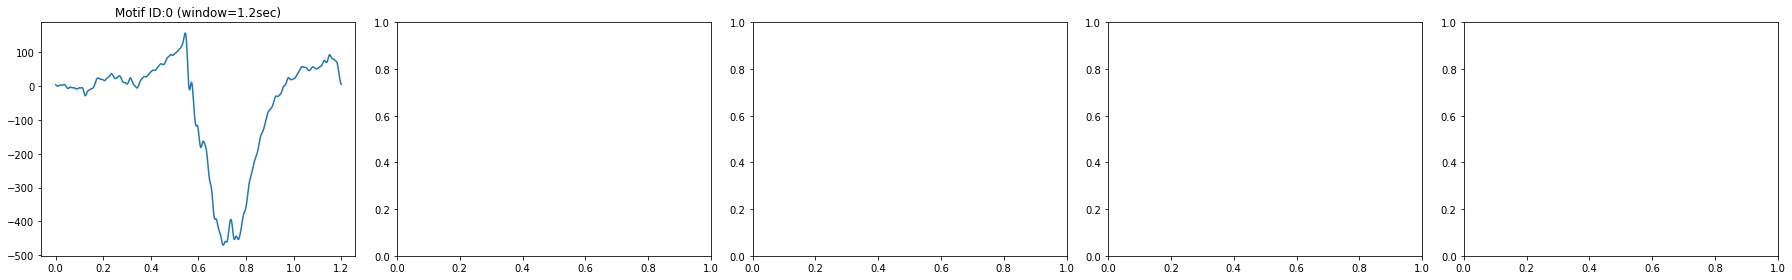

In [14]:
mf = MotifFinder(cache_dir=cache_dir)
mf.plot_found_motives()

In [165]:
%matplotlib tk
cycle_id = 40
mf.plot_labelled_signal(t_start=sc.loc[cycle_id, 'on'], t_stop=sc.loc[cycle_id, 'off'], motives_ids=[0,3,4], max_dist=[30, 25, 25])

Motif ID: 0; Finish mass motif search in 0.0 minutes. # of motives found: 16
Motif ID: 3; Finish mass motif search in 0.0 minutes. # of motives found: 12
Motif ID: 4; Finish mass motif search in 0.0 minutes. # of motives found: 4


In [168]:
mf.plot_motif_rate_vs_time([0,3,4], max_dist=25, rate_window=30*60)

Motif ID: 3; Finish mass motif search in 1.5 minutes. # of motives found: 285
Motif ID: 4; Finish mass motif search in 1.6 minutes. # of motives found: 29


In [134]:
cycle_id = 0
motives, P = mf.calc_overlap_motives(t_start=sc.loc[cycle_id, 'on'], t_stop=sc.loc[cycle_id+2, 'off'], max_overlap=0.5, max_dist=40)
with np.printoptions(precision=2, suppress=True):
    print(P)
motives

AttributeError: 'MotifFinder' object has no attribute 'calc_overlap_motives'

In [158]:
from pickle import dump

with Path('../output/motives/pogona1.pkl').open('wb') as f:
  dump({'mf': mf}, f)

In [55]:
for i in range(P.shape[0]):
  for j in range(P.shape[0]):
    if i == j:
      continue
    elif P[i, j] > 0.5:
      print(f'{i}->{j}: {P[i, j]:.0%}  |  {j}->{i}: {P[j, i]:.0%}')

0->1: 54%  |  1->0: 58%
0->6: 66%  |  6->0: 21%
0->7: 63%  |  7->0: 23%
0->8: 74%  |  8->0: 21%
0->9: 62%  |  9->0: 21%
0->10: 64%  |  10->0: 24%
0->11: 71%  |  11->0: 22%
0->12: 71%  |  12->0: 20%
0->13: 70%  |  13->0: 20%
1->0: 58%  |  0->1: 54%
1->6: 65%  |  6->1: 19%
1->7: 61%  |  7->1: 20%
1->8: 72%  |  8->1: 19%
1->9: 63%  |  9->1: 20%
1->10: 60%  |  10->1: 21%
1->11: 66%  |  11->1: 19%
1->12: 72%  |  12->1: 19%
1->13: 70%  |  13->1: 19%
2->1: 53%  |  1->2: 44%
2->6: 73%  |  6->2: 18%
2->7: 50%  |  7->2: 14%
2->8: 68%  |  8->2: 15%
2->9: 69%  |  9->2: 18%
2->10: 58%  |  10->2: 17%
2->11: 65%  |  11->2: 16%
2->12: 75%  |  12->2: 16%
2->13: 78%  |  13->2: 17%
3->6: 72%  |  6->3: 22%
3->8: 57%  |  8->3: 16%
3->9: 70%  |  9->3: 23%
3->12: 73%  |  12->3: 20%
3->13: 74%  |  13->3: 20%
4->0: 61%  |  0->4: 42%
4->6: 74%  |  6->4: 16%
4->7: 57%  |  7->4: 14%
4->8: 71%  |  8->4: 14%
4->9: 71%  |  9->4: 16%
4->10: 51%  |  10->4: 13%
4->11: 61%  |  11->4: 13%
4->12: 76%  |  12->4: 14%
4->13:

In [10]:
from readers.neuralynx_io import load_ncs

ncs = load_ncs(f'{rootdir}/CSC32.ncs')

/home/regev/PycharmProjects/lfp_clustering/readers/neuralynx_io.py:130: UserWarning: Unable to parse time string from Neuralynx header: ## Time Closed File was not closed properly
  warnings.warn('Unable to parse time string from Neuralynx header: ' + time_string)


In [12]:
len(ncs['data'])

1973023232